# Coastal change in African countries

* **Products used:** [DE Africa Coastlines]()


## Background

Coastal changes have a larget impact on human settlements. 

## Description

This notebook will demonstrate how to load relevant datasets and analyse the impact of coastal changes on human settlements.
Topics covered include:

1. Loading DE Africa Coastlines rates of change statistics data using the `get_coastlines` function.
2. Loading High Resolution Population Density.
3. Combine


## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import geopandas as gpd
import rioxarray as rxr
import numpy as np
#from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.coastal import get_coastlines
#from deafrica_tools.plotting import display_map
from datacube.utils.geometry import Geometry

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
african_countries  = gpd.read_file("../Supplementary_data/MGCI/african_countries.geojson")

In [3]:
african_countries[['n_good', 'n_sig99', 'n_sig95', 'n_neg', 'n_neg1', 'n_neg5', 
                   'rate_time_10th', 'rate_time_50th', 'nsm_10th', 'nsm_50th']] = [np.nan]*10

In [4]:
np.unique(african_countries["COUNTRY"])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Comoros', 'Congo-Brazzaville', 'Cote d`Ivoire',
       'Democratic Republic of Congo', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia',
       'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
       'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'],
      dtype=object)

In [5]:
for idx in african_countries.index:
    print(african_countries.loc[idx].COUNTRY)
    country_geom = Geometry(geom=african_countries.loc[idx].geometry, crs=african_countries.crs)
    bbox = list(country_geom.boundingbox)
    change_gdf = get_coastlines(bbox=bbox, layer='statistics')
    if len(change_gdf)==0: continue
           
    # get stats
    good_gdf = change_gdf[(change_gdf.certainty=='good')]
    african_countries.at[idx, 'n_good'] = len(good_gdf)
    sig_gdf = good_gdf[(good_gdf.sig_time<0.01)]
    african_countries.at[idx, 'n_sig99'] = len(sig_gdf)
    sig_gdf = good_gdf[(good_gdf.sig_time<0.05)]
    african_countries.at[idx, 'n_sig95'] = len(sig_gdf)
    african_countries.at[idx, 'n_neg'] = (sig_gdf.rate_time<0).sum()
    african_countries.at[idx, 'n_neg1'] = (sig_gdf.rate_time<-1).sum()
    african_countries.at[idx, 'n_neg5'] = (sig_gdf.rate_time<-5).sum()
    african_countries.at[idx, 'rate_time_10th'] = sig_gdf.rate_time.quantile(0.1)
    african_countries.at[idx, 'rate_time_50th'] = sig_gdf.rate_time.quantile(0.5)
    african_countries.at[idx, 'nsm_10th'] = sig_gdf.nsm.quantile(0.1)
    african_countries.at[idx, 'nsm_50th'] = sig_gdf.nsm.quantile(0.5)
    

Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Cape Verde
Central African Republic
Chad
Comoros
Congo-Brazzaville
Cote d`Ivoire
Democratic Republic of Congo
Djibouti
Egypt
Equatorial Guinea
Eritrea
Ethiopia
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Kenya
Lesotho
Liberia
Libya
Madagascar
Malawi
Mali
Mauritania
Morocco
Mozambique
Namibia
Niger
Nigeria
Rwanda
Sao Tome and Principe
Senegal
Sierra Leone
Somalia
South Africa
Sudan
Swaziland
Tanzania
Togo
Tunisia
Uganda
Western Sahara
Zambia
Zimbabwe


In [6]:
african_countries['perc_neg']=african_countries['n_neg']*100/african_countries['n_good']
african_countries['perc_neg1']=african_countries['n_neg1']*100/african_countries['n_good']
african_countries['perc_neg5']=african_countries['n_neg5']*100/african_countries['n_good']

african_countries['km_neg']=african_countries['n_neg']*30/1000
african_countries['km_neg1']=african_countries['n_neg1']*30/1000
african_countries['km_neg5']=african_countries['n_neg5']*30/1000


In [7]:
african_countries.to_file("african_countries_coastalchange.geojson")

In [8]:
african_countries_coastalchange  = gpd.read_file("african_countries_coastalchange.geojson")

<AxesSubplot: >

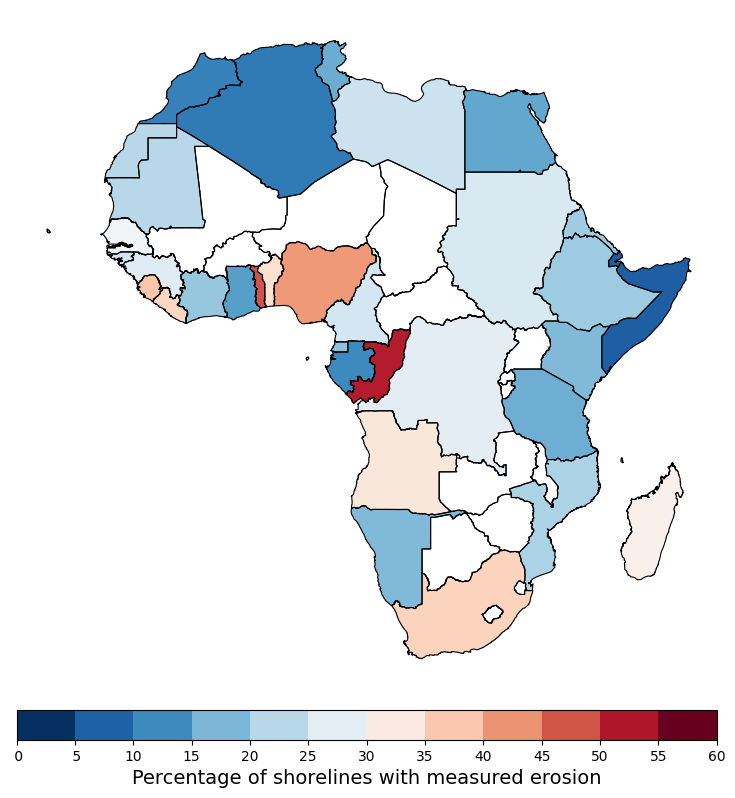

In [9]:
from matplotlib import pyplot as plt
import matplotlib as mpl

vmin, vmax = 0,65
steps = 5
title = 'Percentage of shorelines with measured erosion'

# Define plot and colourbar axes
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])


# Define colour map
cmap = mpl.cm.RdBu_r
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

# Define colourbar labelling
# cbar.set_ticks([])
cbar.set_ticks([i for i in np.arange(vmin,vmax,steps)])
cbar.set_ticklabels(list('{:2}'.format(i) for i in (list(np.arange(vmin, vmax, steps)))))
cbar.set_label(title, fontsize='14')

# Turn off lon-lat ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# # Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

african_countries_coastalchange.plot('perc_neg', ax=ax, cmap=cmap,vmin=vmin, vmax=vmax)
african_countries_coastalchange.geometry.plot(ax=ax, linewidth=0.8, edgecolor='black', facecolor="none")


In [10]:
african_countries_coastalchange[african_countries_coastalchange['km_neg']==african_countries_coastalchange['km_neg'].max()]

,ID,CODE,COUNTRY,n_good,n_sig99,n_sig95,n_neg,n_neg1,n_neg5,rate_time_10th,rate_time_50th,nsm_10th,nsm_50th,perc_neg,perc_neg1,perc_neg5,km_neg,km_neg1,km_neg5,geometry
36,626,NIR,Nigeria,8670.0,5299.0,6096.0,4029.0,3224.0,939.0,-6.385,-1.11,-77.98,-13.785,46.470588,37.185698,10.83045,120.87,96.72,28.17,"POLYGON ((13.07089 9.51345, 13.05967 9.50948, ..."


<AxesSubplot: >

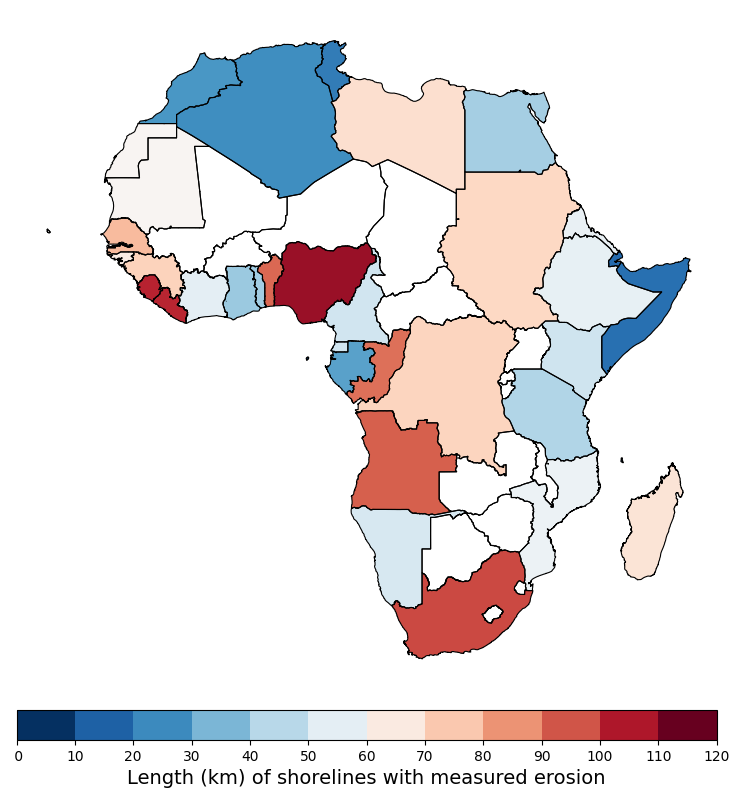

In [11]:
vmin, vmax = 0,130
steps = 10
title = 'Length (km) of shorelines with measured erosion'

# Define plot and colourbar axes
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.subplots_adjust(bottom=0.2)
cax = fig.add_axes([0.16, 0.15, 0.70, 0.03])


# Define colour map
cmap = mpl.cm.RdBu_r
bounds = list(np.arange(vmin,vmax,steps))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')

# Define colourbar labelling
# cbar.set_ticks([])
cbar.set_ticks([i for i in np.arange(vmin,vmax,steps)])
cbar.set_ticklabels(list('{:2}'.format(i) for i in (list(np.arange(vmin, vmax, steps)))))
cbar.set_label(title, fontsize='14')

# Turn off lon-lat ticks and labels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# # Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

african_countries_coastalchange.plot('km_neg', ax=ax, cmap=cmap,vmin=vmin, vmax=vmax)
african_countries_coastalchange.geometry.plot(ax=ax, linewidth=0.8, edgecolor='black', facecolor="none")


<AxesSubplot: >

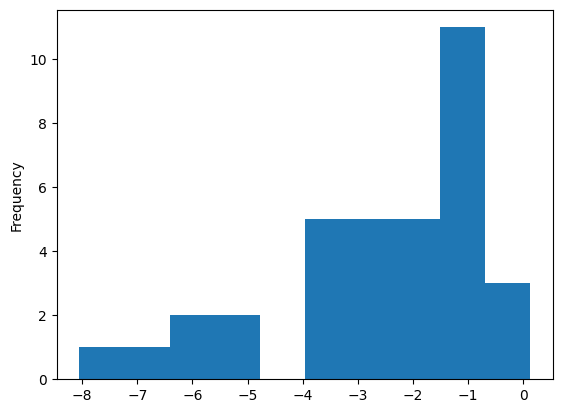

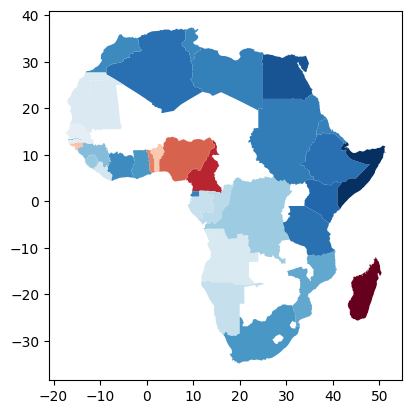

In [12]:
african_countries_coastalchange['rate_time_10th'].plot.hist()
african_countries_coastalchange.plot('rate_time_10th', cmap='RdBu')

<AxesSubplot: >

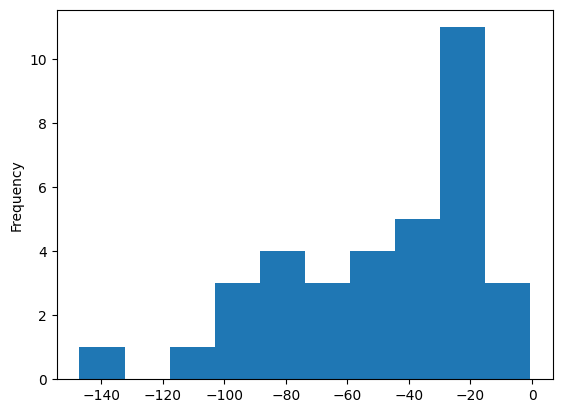

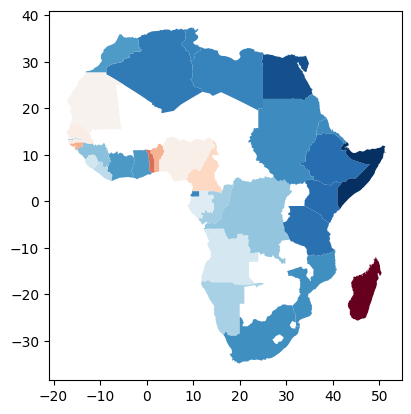

In [13]:
african_countries_coastalchange['nsm_10th'].plot.hist()
african_countries_coastalchange.plot('nsm_10th', cmap='RdBu')

In [14]:
country = "Liberia"

In [15]:
idx = african_countries[african_countries['COUNTRY'] == country].index[0]
country_geom = Geometry(geom=african_countries.iloc[idx].geometry, crs=african_countries.crs)

In [16]:
bbox = list(country_geom.boundingbox)

## View the selected location

The next cell will display the selected area on an interactive map. Feel free to zoom in and out to get a better understanding of the area you'll be analysing. Clicking on any point of the map will reveal the latitude and longitude coordinates of that point.

In [17]:
display_map(x=(bbox[0], bbox[2]), y=(bbox[1], bbox[3]))

NameError: name 'display_map' is not defined

## Loading Population data

In [ ]:
ds = rxr.open_rasterio('s3://dataforgood-fb-data/hrsl-cogs/hrsl_general/hrsl_general-latest.vrt', 
                       chunks ={'x': 1000, 'y': 1000})

### Population within a buffer of 2021 shoreline

In [ ]:
buffer = 50 #meter

In [ ]:
# Load DE Africa Coastlines annual shorelines data. 
deacl_shorelines_gdf = get_coastlines(bbox=bbox, 
                                      layer='shorelines')

In [ ]:
buffered = deacl_shorelines_gdf.copy()

In [ ]:
buffered['geometry'] = deacl_shorelines_gdf.to_crs('6933').buffer(buffer).to_crs('4326')

In [ ]:
coast_bbox = buffered.unary_union.bounds
coast_bbox

In [ ]:
pop_raster = ds.isel(band=0).sel(x=slice(coast_bbox[0],coast_bbox[2]), y = slice(coast_bbox[3], coast_bbox[1])).compute()
#youth_raster = ds_youth.isel(band=0).sel(x=slice(coastal_bbox[0],coastal_bbox[2]), y = slice(coastal_bbox[3],coastal_bbox[1]))

pop_raster=pop_raster.rename({'x':'longitude','y':'latitude'})
#youth_raster=youth_raster.rename({'x':'longitude','y':'latitude'})


country_mask = xr_rasterize(gdf=african_countries[african_countries['COUNTRY'] == country],
                                  da=pop_raster,
                                  transform=pop_raster.geobox.transform,
                                  crs=pop_raster.geobox.crs)

In [ ]:
coastal_pop = {}
for year in range(2000,2021):
    coastal_area = buffered[buffered.year==str(year)]
    coastal_raster = xr_rasterize(gdf=coastal_area,
                                  da=pop_raster,
                                  transform=pop_raster.geobox.transform,
                                  crs=pop_raster.geobox.crs)
    
    #fraction of coastal population
    coastal_pop[year] = (coastal_raster*pop_raster*country_mask).sum().values
    print(year, coastal_pop[year]) 

In [ ]:
import pandas as pd
import numpy as np

# convert to million
pd.DataFrame(np.array(list(coastal_pop.values()))/1e6, 
             columns=[f'General'], 
             index=[str(x) for x in coastal_pop.keys()]
            ).plot(ylabel=f'Population within {buffer}m from coast (million)',xlabel='Year')